In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')      

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Vamos ver o total de passageiro no nosso dataset
print(f'Total de passageiro: {len(df)}')
print(f'Total de sobreviventes: {len(df[df.Survived ==1])}')

Total de passageiro: 891
Total de sobreviventes: 342


In [31]:
print(f'Total de sobreviventos homens em %:', 100 * np.mean(df[df['Sex'] == 'male']['Survived']))
print('Total de sobreviventes mulheres em %', 100 * np.mean(df[df['Sex'] == 'female']['Survived']))

Total de sobreviventos homens em %: 18.890814558058924
Total de sobreviventes mulheres em % 74.20382165605095


In [35]:
print('Total de passageiros sobrevivented da primeira classe em %', 100*np.mean(df['Survived'][df['Pclass'] == 1]))
print('Total de passageiros sobrevivented da terceira classe em %', 100*np.mean(df['Survived'][df['Pclass'] == 3]))

Total de passageiros sobrevivented da primeira classe em % 62.96296296296296
Total de passageiros sobrevivented da terceira classe em % 24.236252545824847


In [36]:
print('% de criancas sobreviventes', 100*np.mean(df['Survived'][df['Age'] < 18]))
print('% de adultos sobreviventes', 100*np.mean(df['Survived'][df['Age'] > 18]))

% de criancas sobreviventes 53.98230088495575
% de adultos sobreviventes 38.26086956521739


In [37]:
#Usando a função lambda para transformar o sexo em variavel númerica
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0) #Se o sexo for masculino o variavel rece 1, caso contrario 0

In [38]:
df['Sex']
#Verificando

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [39]:
#Vamos verificar todas as variavesi com valores vazios

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
#Pode preencher os valores vazios de Age com a idade media
df['Age'] = df['Age'].fillna(np.mean(titanic['Age'])) #Usamos o fillna para preecher os valores vazios

In [42]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [46]:
df.Embarked.fillna(value='S', axis = 0, inplace = True) #mesmo metodo que usamos com a idade

In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:
#Como a cabine não é uma variavel relevantes, irei só ignorar por hora

In [49]:
#Selecioando as variaveis para no nosso modelo de machine learning
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [53]:
#Agora separamos em variavel e targe

X= df.drop('Survived', axis = 1)
y = df['Survived']

In [54]:
import sklearn

In [55]:
#Agora vamos separar em dados de treinamento e dados de test, setamos 67% para treino e 33% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
#Agora precisamos escolher o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
#Agora vamos ver a precisão do nosso modelo
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 176.3 kB/s eta 0:00:001m395.7 kB/s eta 0:00:01


In [59]:
from sklearn.metrics import accuracy_score
print('Precisao em treino...', accuracy_score(y_train, model.predict(X_train)))
print('Precisao em teste', accuracy_score(y_test, model.predict(X_test)))

Precisao em treino... 0.9798657718120806
Precisao em teste 0.7457627118644068


In [60]:
#Com essa diferença grande diferença entre treino e teste, provavelemnte o nosso modelo deu overfiting, ou seja ele meio que gravou o resultados do treino em vez de tentar prever
#Vejamos como podemos melhorar isso 

# Agora vamos ver o nosso modelo de decisão, ver como o nosso modelo de ML, baseou as deciçoes dele para ver quem sobreviveria e quem não

In [83]:
from sklearn.tree import export_graphviz
import graphviz
!pip install pydotplus
import pydotplus
from IPython.display import Image

Defaulting to user installation because normal site-packages is not writeable


In [84]:
#Pra podermos visualizar a nossa arvore de decisão, e ver qual o problema
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True) 

In [85]:
graph1=graphviz.Source(dot_data);
graph = pydotplus.graph_from_dot_data(dot_data)

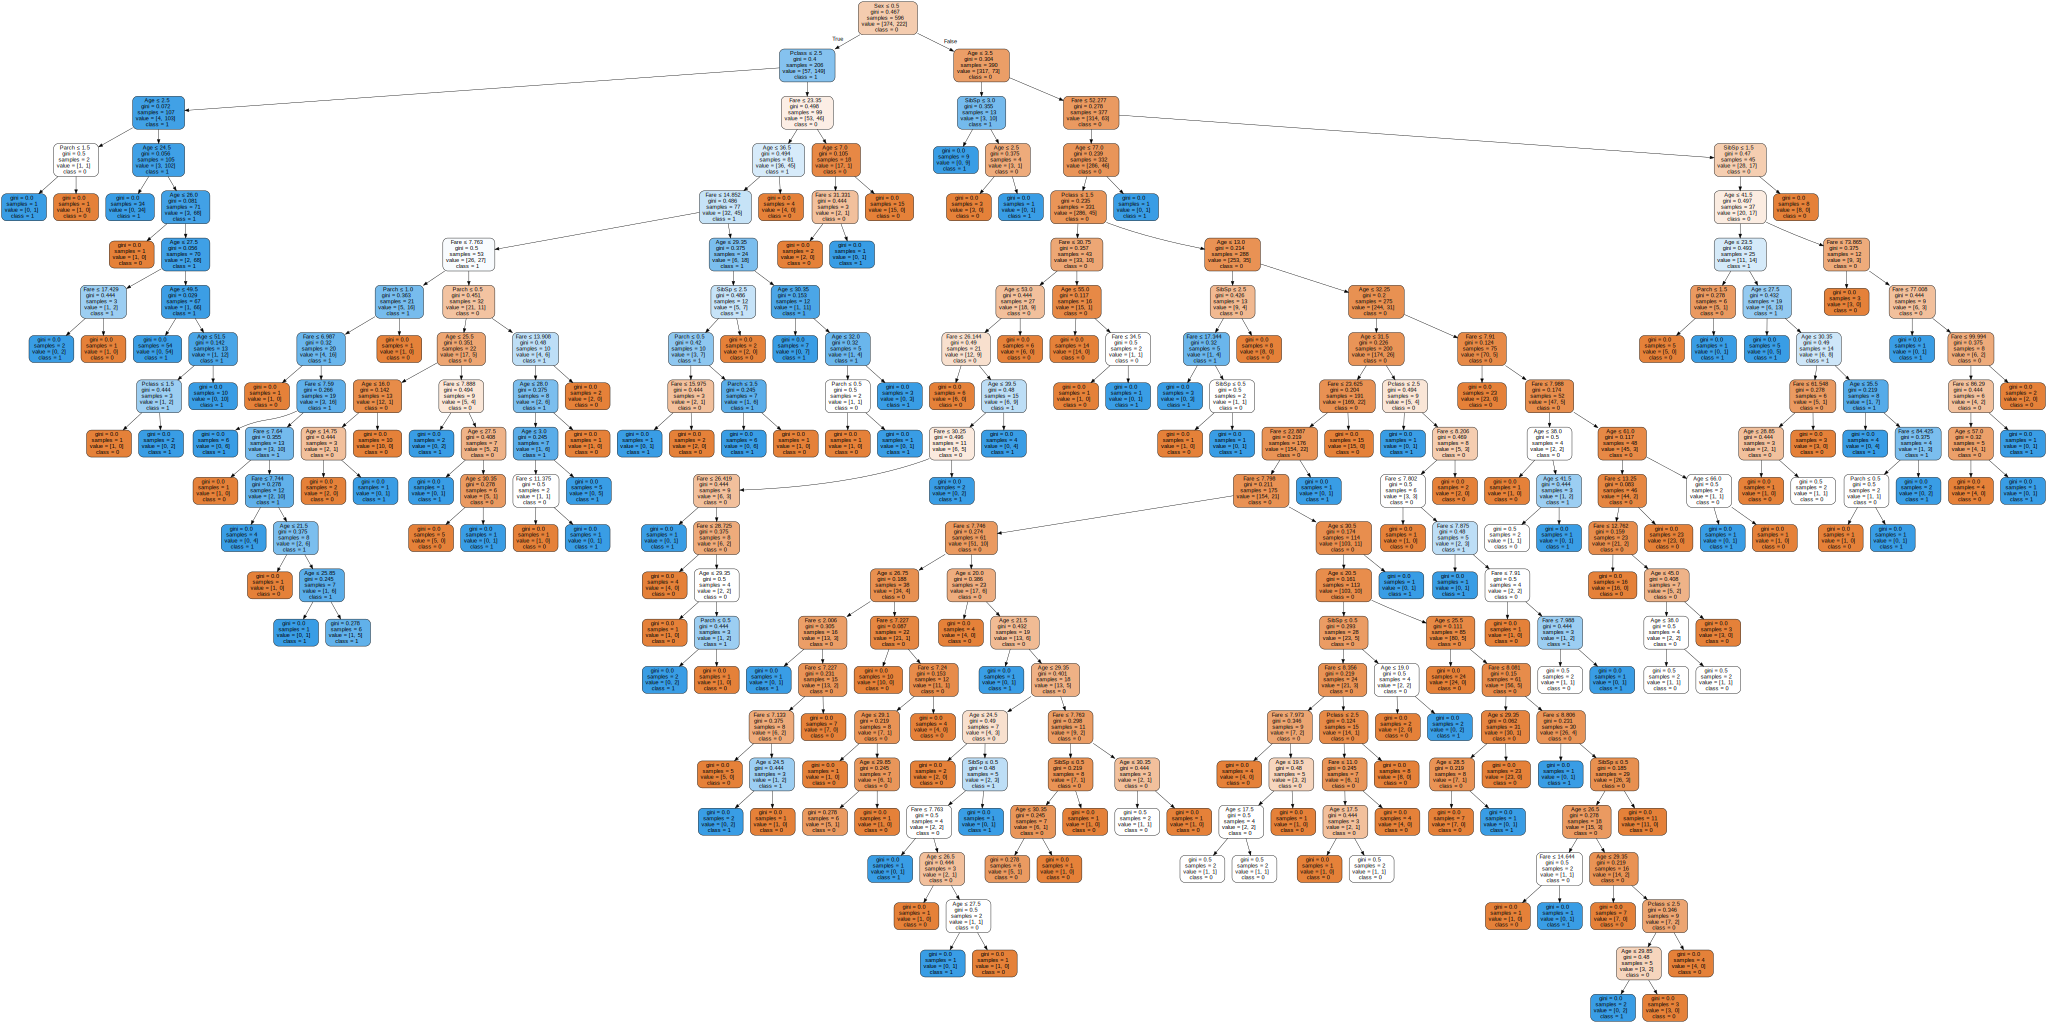

In [86]:
graph1

#O modelo ficou muito complexo, o que pode significar que ele tentou estabelecer padroes para todos os sobreviventes, em vez de generalizar, que serviviria melhor para o que estamos tentando fazer, um modo de previnir que isso aconteça ou melhorar o nosso modelo é simplificar a quantidade perguntas ou galhos da nossa arvore de decisão. Vamos la.

#Vamos diminuir a quantidade de perguntas para no máximo 3, assim podemos melhorar a generalização

In [88]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [89]:
print('Precisão do treinamento' , accuracy_score(y_train, model_improved.predict(X_train)))
print('Precisão do teste', accuracy_score(y_test, model_improved.predict(X_test)))

Precisão do treinamento 0.8238255033557047
Precisão do teste 0.8203389830508474


In [90]:
# Melhorou agora vamos ver a nossa nova arvore de decisao 
dot_data= export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True) 

In [91]:
graph2=graphviz.Source(dot_data)

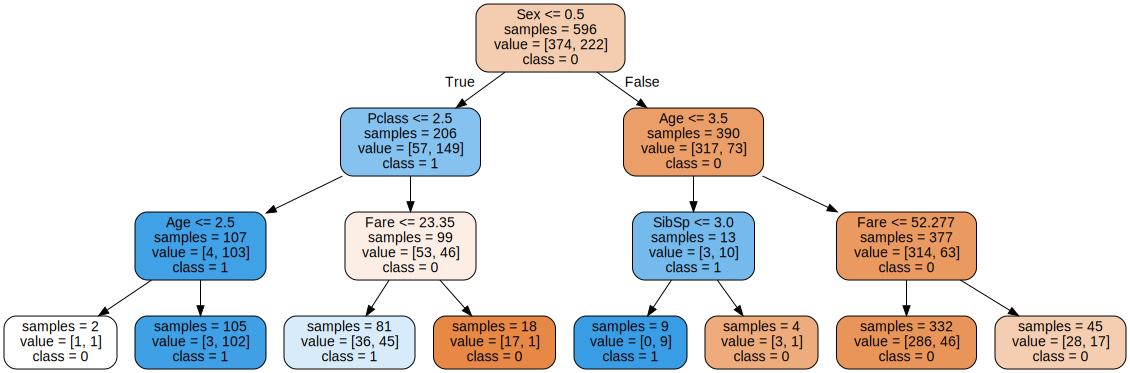

In [92]:
graph2

# Pronto bem menor e mais simples

É possivel ver que o feature mais relevantes foi o Sexo, e logo em seguida a idade e por fim a classe. Sendo o sexo mais relevantes quando se tratava das mulheres, e a idade mais relevantes para os homens. Com isso temos um modelo de machine learning simples usando o classico Titanic Dataset